In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import fileinput
import csv
from itertools import product
from tqdm import tqdm
import seaborn as sns
sns.set_style('whitegrid')

# figures will be inside notebook
%matplotlib inline 


## Case study : Remove peak days > cut off

### Tweet sequence 

In [3]:
df2 = pd.read_csv('celebrity-mentioned.csv', parse_dates=['date'])


In [4]:
clist =  df2.celebrity.unique().copy()
celebno  = 79
clist[celebno]

'taylorswift13'

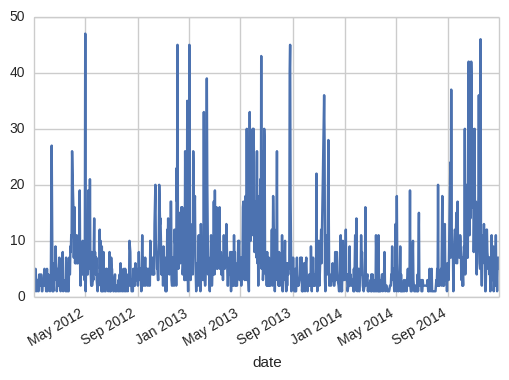

In [5]:
alltweets = df2.loc[df2['celebrity'] == clist[celebno]].copy()
cutoff = 50
temp2 = alltweets.groupby('date').size().copy()
temp_ind = temp2[temp2 < cutoff].index.get_level_values('date')
temp2[temp2 < cutoff].plot()
temp = alltweets[alltweets['date'].isin(temp_ind)].copy()


path = 'celebrity/' + str(clist[celebno])
if not os.path.exists(path):
    os.mkdir(path)
plt.savefig(os.path.join(path,'Peakrem_daily_' + str(clist[celebno])+'.png'))



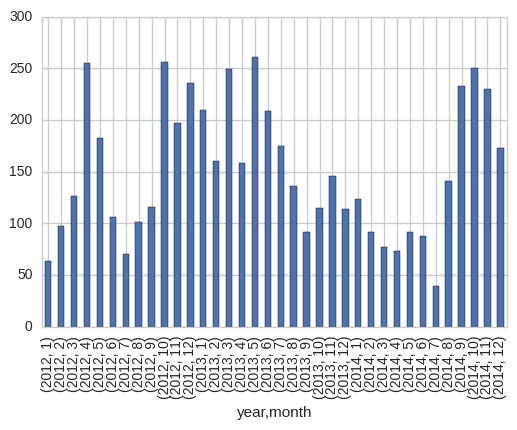

In [112]:
temp['date'] = pd.to_datetime(temp['date'])
temp['year'], temp['month'] = temp['date'].apply(lambda x: x.year), temp['date'].apply(lambda x: x.month)
temp['quarter'] = temp['date'].apply(lambda x: x.quarter)
# temp.groupby(['year', 'quarter']).size().plot(kind='bar')
temp.groupby(['year', 'month']).size().plot(kind='bar')
plt.savefig(os.path.join(path,'Peakrem_monthly_' + str(clist[celebno])+'.png'))

## Role distribution over time

In [113]:
# temp['year'] = temp.date.dt.year
# temp['month'] = temp.date.dt.month
# temp['quarter'] = temp.date.dt.quarter

role_count = temp.groupby(['year', 'month', 'role']).size().unstack(level=2)
#role_count.head()

In [114]:
role_count.sum(axis=1)
role_dist = role_count.div(role_count.sum(axis=1), axis=0)
role_dist.reset_index(inplace=True)
role_dist['year/month'] = map(lambda x, y: "(%s, %s)" % (x, y), role_dist.year, role_dist.month)
role_dist.Bully += role_dist.Advocate
role_dist.Confidant += role_dist.Bully
role_dist.Other += role_dist.Confidant
role_dist.Victim += role_dist.Other
#role_dist.head()

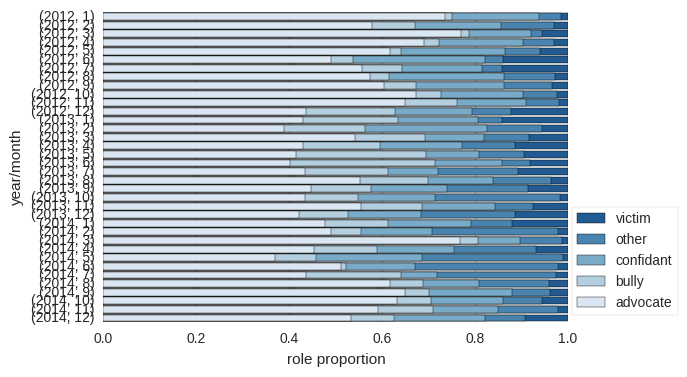

In [115]:
fig, ax = plt.subplots()
cols = ['Victim', 'Other', 'Confidant', 'Bully', 'Advocate']
colors = sns.color_palette('Blues_r', len(cols))

for col_label, color in zip(cols, colors):
    snsplot = sns.barplot(x=col_label, y='year/month', data=role_dist, color=color, label=col_label.lower())

ax.legend(loc='lower right', bbox_to_anchor=(1.25, 0), frameon=True)
ax.set(xlim=(0, 1), xlabel='role proportion')
sns.despine(left=True, bottom=True)

snsplot.figure.savefig(os.path.join(path,'Peakrem_role_' + str(clist[celebno])+'.png'))